### 네이버 데이터랩에서 검색어 트렌드 분석
* 검색어 트렌드 분석을 통한 검색어 증가에 따른 주가 영향 분석
* 마케팅 효과에따른 검색어 증가량 분석
* 마케팅 수명관리
* 경쟁사 마케팅 파급효과 분석


In [3]:
nid=
nkey=

### reference
* 네이버 디벨로퍼 가입
* 어플리케이션 등록
* https://developers.naver.com/docs/datalab/search/#python

In [4]:

import json ###########################
import os
import sys
import urllib.request

client_id = nid ##########################
client_secret = nkey ###########################
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"]},
          {"groupName":"반도","keywords":["반도","CJ ENM"]}
    ]
    }"""
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)
    

{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"],"data":[{"period":"2019-01-01","ratio":0.99682},{"period":"2019-02-01","ratio":1.23235},{"period":"2019-03-01","ratio":1.03002},{"period":"2019-04-01","ratio":7.92022},{"period":"2019-05-01","ratio":46.82542},{"period":"2019-06-01","ratio":59.07226},{"period":"2019-07-01","ratio":11.90921},{"period":"2019-08-01","ratio":12.20851},{"period":"2019-09-01","ratio":4.86102},{"period":"2019-10-01","ratio":3.7481},{"period":"2019-11-01","ratio":5.34911},{"period":"2019-12-01","ratio":5.05451},{"period":"2020-01-01","ratio":20.11018},{"period":"2020-02-01","ratio":100},{"period":"2020-03-01","ratio":9.47802},{"period":"2020-04-01","ratio":5.92012},{"period":"2020-05-01","ratio":4.90204},{"period":"2020-06-01","ratio":4.35607},{"period":"2020-07-01","ratio":4.52975},{"period":"2020-08-01","ratio":4.40892}]},{"title":"반도","keywords":["반도","CJ ENM"],"data":[{"peri

2
       period     ratio
0  2019-01-01   0.99682
1  2019-02-01   1.23235
2  2019-03-01   1.03002
3  2019-04-01   7.92022
4  2019-05-01  46.82542


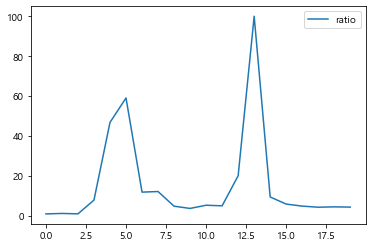

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

jdata=json.loads(res)

print(len(jdata['results']))
pdata=jdata['results'][0]['data']
cjdf=pd.DataFrame.from_dict(pdata)
print(cjdf.head())
cjdf.plot()

In [6]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['기생충','봉준호','짜파구리'],
['나쁜녀석들'],
['백두산'],
]
def makeQry(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    res=[]
    for words in keywords:
        dict={'groupName':words[0],'keywords':words}
        res.append(dict)
    rdict={"startDate":sday,
    "endDate":eday,
    "timeUnit":tunit,
    "keywordGroups":res
          }
    return json.dumps(rdict,ensure_ascii = False )

makeQry(keywords,'2019-01-01','2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "극한직업", "keywords": ["극한직업"]}, {"groupName": "사바하", "keywords": ["사바하"]}, {"groupName": "걸캅스", "keywords": ["걸캅스"]}, {"groupName": "기생충", "keywords": ["기생충", "봉준호", "짜파구리"]}, {"groupName": "나쁜녀석들", "keywords": ["나쁜녀석들"]}, {"groupName": "백두산", "keywords": ["백두산"]}]}'

In [7]:
def Mynsearch(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):    
    client_id = nid ##########################
    client_secret = nkey ###########################
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body=makeQry(keywords,sday,eday,tunit)
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
        #print(res)
    else:
        res="error"
        print("Error Code:" + rescode)
    return res

In [8]:

def MyDataLab(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    # 네이버 데이터랩 서치
    res=Mynsearch(keywords,sday,eday,tunit)
    #데이터 추출을 위한 json
    jdata=json.loads(res)
            #print(len(jdata['results']))
    i=0;
    #테이블 머지를 위한 기초테이블
    maindf=pd.DataFrame()
    # 키워드별로 컬럼명 지정
    for words in keywords:
        pdata=jdata['results'][i]['data']
        i+=1
        df=pd.DataFrame.from_dict(pdata)
        df.columns=["period",words[0].strip()]
        df1=df.set_index("period")
        maindf=pd.merge(maindf,df1,how="outer",left_index=True,right_index=True)
    return maindf


               극한직업      사바하      걸캅스    나쁜녀석들      백두산
period                                                 
2019-01-01  0.51273  0.03758  0.01178  0.15669  0.14547
2019-01-02  0.59014  0.03655  0.01355  0.14220  0.11658
2019-01-03  0.57528  0.02870  0.00981  0.11350  0.10892
2019-01-04  5.09767  0.02758  0.01552  0.12453  0.10172
2019-01-05  1.13232  0.03300  0.01299  0.14248  0.08695


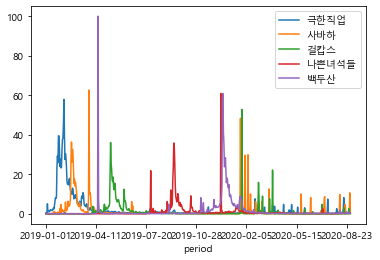

In [10]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
['백두산'],
#['기생충','봉준호','짜파구리'],
]
mdf=MyDataLab(keywords,'2019-01-01','2020-08-30','date')
print(mdf.head())
mdf.plot()
plt.show()